In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━

In [ ]:
import os
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

In [ ]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()


In [ ]:
DataPath='/content/drive/MyDrive/MoC Grant/Data/'


In [ ]:
#SaadiNotJoined=pd.read_csv(DataPath+'CopySaadiParallelWithoutJoined.tsv',sep='\t')

In [ ]:
#SaadiNotJoined=pd.read_csv(DataPath+'SaadiNotJoined_PRC_Keyphrased4maxsum2003.csv',sep='\t')

In [ ]:
#SaadiNotJoined=pd.read_csv(DataPath+'SaadiNotJoined_PRC_Keyphrased4maxsumAraT5Tiltles_AraT5SumMbertSum2103.csv',sep='\t')

In [ ]:
SaadiNotJoined=pd.read_csv(DataPath+'SaadiNotJoined_PRC_Summaries2203.csv',sep='\t')


In [ ]:
SaadiNotJoined.columns

Index(['Sourah_number', 'Verse_Number', 'VerseDiac', 'Verse', 'Sourah_Ar',
       'Sourah_En', 'Sahih_int', 'Pickthall', 'YA', 'Shakir', 'MS', 'MK',
       'Arberry', 'Sourah', 'Verse_Tafssir', 'Verse_Tafssir_prc', 'Keyphrases',
       'AraT5Title', 'mbertSum', 'Keyphrases2', 'AraT5Sum'],
      dtype='object')

In [ ]:
SaadiNotJoined=SaadiNotJoined[~SaadiNotJoined['Verse'].isnull()]

In [ ]:
#SaadiNotJoined['Sahih_length']=SaadiNotJoined.Sahih_int.apply(lambda x: len(x.split(' ')))

In [ ]:
#print('Sahih average length', SaadiNotJoined['Sahih_length'].mean())
#print('Sahih median length', SaadiNotJoined['Sahih_length'].median())

Sahih average length 32.98039215686274
Sahih median length 29.0


# Context injection

## Preprocessing

In [ ]:
!pip install tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 10.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [ ]:
SaadiNotJoined['Verse_Tafssir_prc']=SaadiNotJoined['Verse_Tafssir'].apply(lambda x: normalizeArabic(x))
SaadiNotJoined['Verse_Tafssir_prc']=SaadiNotJoined['Verse_Tafssir_prc'].apply(lambda x: remove_stop_words(x))

## Focus

### KeyBERT

In [ ]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 86.2 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=c178a5986184424b9b028552f55d99e6dd460d6389990178cacf1dcd740da636
  Stored in directory: /root/

In [ ]:
n=9
print('---------Verse-----------\n')
print(SaadiNotJoined['Verse'][n],'\n')
print('---------Tafssir-----------\n')
SaadiNotJoined['Verse_Tafssir_prc'][n]

---------Verse-----------

والذين يؤمنون بما انزل اليك وما انزل من قبلك وبالاخرة هم يوقنون 

---------Tafssir-----------



'يءمنون انزل اليك القران والسنه، تعالي وانزل الله الكتاب والحكمه فالمتقون يءمنون بجميع جاء الرسول، يفرقون انزل اليه، فيءمنون ببعضه، يءمنون ببعضه، بجحده تاويله، علي مراد الله ورسوله، يفعل يفعله المبتدعه، يءولون النصوص الداله علي خلاف قولهم، حاصله التصديق بمعناها، صدقوا بلفظها، فلم يءمنوا ايمانا حقيقيا وقوله انزل قبلك يشمل الايمان بالكتب السابقه، ويتضمن الايمان بالكتب الايمان بالرسل وبما اشتملت عليه، خصوصا التوراه والانجيل والزبور، وهذه خاصيه المءمنين يءمنون بجميع الكتب السماويه وبجميع الرسل يفرقون منهم وبالاخره يوقنون الاخره اسم الموت، وخصه بالذكر العموم، لان الايمان باليوم الاخر، اركان الايمان ولانه اعظم باعث علي الرغبه والرهبه والعمل، اليقين العلم التام ادني شك، الموجب للعمل'

In [ ]:
from keybert import KeyBERT

# doc = """
#          Supervised learning is the machine learning task of learning a function that
#          maps an input to an output based on example input-output pairs. It infers a
#          function from labeled training data consisting of a set of training examples.
#          In supervised learning, each example is a pair consisting of an input object
#          (typically a vector) and a desired output value (also called the supervisory signal).
#          A supervised learning algorithm analyzes the training data and produces an inferred function,
#          which can be used for mapping new examples. An optimal scenario will allow for the
#          algorithm to correctly determine the class labels for unseen instances. This requires
#          the learning algorithm to generalize from the training data to unseen situations in a
#          'reasonable' way (see inductive bias).
#       """
n=15
doc= SaadiNotJoined['Verse_Tafssir'][n]
kw_model = KeyBERT(model="paraphrase-multilingual-MiniLM-L12-v2")
keywords = kw_model.extract_keywords(doc)

In [ ]:
keywords

[('القرآن', 0.6905),
 ('المؤمنين', 0.6137),
 ('والإنجيل', 0.5516),
 ('الإيمان', 0.5514),
 ('إيمانا', 0.544)]

In [ ]:
keyphrases=kw_model.extract_keywords(doc, keyphrase_ngram_range=(4, 4), stop_words=None)
keyphrases

[('القرآن والسنة قال تعالى', 0.7942),
 ('وهو القرآن والسنة قال', 0.7869),
 ('مراد الله ورسوله كما', 0.7726),
 ('أنزل إليك وهو القرآن', 0.7324),
 ('الله ورسوله كما يفعل', 0.7171)]

In [ ]:
' '.join([elm[0] for elm in keyphrases])

'القرآن والسنة قال تعالى وهو القرآن والسنة قال القرآن والسنة قال مراد الله ورسوله كما مراد الله ورسوله'

In [ ]:
keyphrases=kw_model.extract_keywords(doc, keyphrase_ngram_range=(4,4), stop_words=None,
                              use_maxsum=True, nr_candidates=30, top_n=4)
keyphrases

[('الإصلاح في الأرض أن', 0.192),
 ('بطاعة الله والإيمان به', 0.1969),
 ('بذلك علما تقوم به', 0.215),
 ('في الأرض إفسادا لأنه', 0.8381)]

In [ ]:
keyphrases=kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, nr_candidates=20, top_n=5)
keyphrases

[('القرآن والسنة قال', 0.7837),
 ('قال والذين يؤمنون', 0.7079),
 ('غير مراد الله', 0.5795),
 ('خصوصا التوراة والإنجيل', 0.5327),
 ('أنزل إليك وهو', 0.3856)]

In [ ]:
def Keyphrasing(document):
  keyphrases=kw_model.extract_keywords(document, keyphrase_ngram_range=(4,4), stop_words=None,
                              use_maxsum=True, nr_candidates=30, top_n=3)
  return ' '.join([elm[0] for elm in keyphrases])

In [ ]:
def Keyphrasing2(text):
  lgt = int(len(text)/3) # chunk length
  chunks = [text[i:i+lgt] for i in range(0, len(text), lgt)]
  results=[]
  for chunk in chunks:
    if len(chunk)>20:
      keyphrases=kw_model.extract_keywords(chunk, keyphrase_ngram_range=(3,3), stop_words=None,
                              use_maxsum=True, nr_candidates=30, top_n=2)
      results.extend([','.join([elm[0] for elm in keyphrases])])
  return ' '.join(results)

In [ ]:
SaadiNotJoined['Verse_Tafssir_prc'][26]

'وهذا دليل عقلي على صدق رسول الله صلى الله عليه وسلم، وصحة ما جاء به ، فقال: وإن كنتم معشر المعاندين للرسول، الرادين دعوته، الزاعمين كذبه، في شك واشتباه، مما نزلنا على عبدنا، هل هو حق أو غيره ؟ فهاهنا أمر نصف، فيه الفيصلة بينكم وبينه، وهو أنه بشر مثلكم، ليس بأفصحكم ولا بأعلمكم وأنتم تعرفونه منذ نشأ [ ص: 47 ] بينكم، لا يكتب ولا يقرأ، فأتاكم بكتاب زعم أنه من عند الله، وقلتم أنتم أنه تقوله وافتراه، فإن كان الأمر كما تقولون، فأتوا بسورة من مثله، واستعينوا بمن تقدرون عليه من أعوانكم وشهدائكم، فإن هذا أمر يسير عليكم، خصوصا وأنتم أهل الفصاحة والخطابة، والعداوة العظيمة للرسول، فإن جئتم بسورة من مثله، فهو كما زعمتم، وإن لم تأتوا بسورة من مثله وعجزتم غاية العجز، ولن تأتوا بسورة من مثله، ولكن هذا التقييم على وجه الإنصاف والتنزل معكم، فهذا آية كبرى، ودليل واضح جلي على صدقه وصدق ما جاء به، فيتعين عليكم اتباعه، واتقاء النار التي بلغت في الحرارة العظيمة والشدة ، أن كانت وقودها الناس والحجارة، ليست كنار الدنيا التي إنما تتقد بالحطب، وهذه النار الموصوفة معدة ومهيأة للكافرين بالله ورسله. فاحذروا الكفر ب

In [ ]:
SaadiNotJoined['Keyphrases2']=SaadiNotJoined['Verse_Tafssir'].progress_apply(lambda x: Keyphrasing2(x))

100%|██████████| 2907/2907 [30:51<00:00,  1.57it/s]


### AraT5 Tilte Generation & others

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.3 MB/s eta 0:00:00


In [ ]:
!pip install SentencePiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00


In [ ]:
SaadiNotJoined['Verse_Tafssir'][n]

'أتأمرون الناس بالبر أي: بالإيمان والخير، وتنسون أنفسكم أي: تتركونها عن أمرها بذلك، والحال: وأنتم تتلون الكتاب أفلا تعقلون وأسمى العقل عقلا لأنه يعقل به ما ينفعه من الخير، وينعقل به عما يضره، وذلك أن العقل يحث صاحبه أن يكون أول فاعل لما يأمر به، وأول تارك لما ينهى عنه، فمن أمر غيره بالخير ولم يفعله، أو نهاه عن الشر فلم يتركه، دل على عدم عقله وجهله، خصوصا إذا كان عالما بذلك، قد قامت عليه الحجة.  وهذه الآية، وإن كانت نزلت في سبب بني إسرائيل، فهي عامة لكل أحد لقوله تعالى: يا أيها الذين آمنوا لم تقولون ما لا تفعلون كبر مقتا عند الله أن تقولوا ما لا تفعلون وليس في الآية أن الإنسان إذا لم يقم بما أمر به أنه يترك الأمر بالمعروف، والنهي عن المنكر ، لأنها دلت على التوبيخ بالنسبة إلى الواجبين، وإلا فمن المعلوم أن على الإنسان واجبين: أمر غيره ونهيه، وأمر نفسه ونهيها، فترك أحدهما، لا يكون رخصة في ترك الآخر، فإن الكمال أن يقوم الإنسان بالواجبين، والنقص الكامل أن يتركهما، وأما قيامه بأحدهما دون الآخر، فليس في رتبة الأول، وهو دون الأخير، وأيضا فإن النفوس مجبولة على عدم الانقياد لمن يخالف قوله فعله، ف

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/AraT5-base-title-generation")
model = AutoModelForSeq2SeqLM.from_pretrained("UBC-NLP/AraT5-base-title-generation")




def Titles(document):
  encoding = tokenizer.encode_plus(document,pad_to_max_length=True, return_tensors="pt")
  input_ids, attention_masks = encoding["input_ids"], encoding["attention_mask"]

  outputs = model.generate(
    input_ids=input_ids, attention_mask=attention_masks,
    max_length=512,
    do_sample=False,
    top_k=120,
    top_p=0.95,
    early_stopping=True,
    num_return_sequences=1,

)
  return tokenizer.decode(outputs[0], skip_special_tokens=True,clean_up_tokenization_spaces=True)



In [ ]:
SaadiNotJoined['AraT5Title']=SaadiNotJoined['Verse_Tafssir'].progress_apply(lambda x: Titles(x))

  0%|          | 0/2907 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 2907/2907 [2:03:02<00:00,  2.54s/it]


In [ ]:
SaadiNotJoined.sample(2)

,Sourah_number,Verse_Number,VerseDiac,Verse,Sourah_Ar,Sourah_En,Sahih_int,Pickthall,YA,Shakir,MS,MK,Arberry,Sourah,Verse_Tafssir,Verse_Tafssir_prc,Keyphrases,AraT5Title
2901,37.0,142,فَٱلۡتَقَمَهُ ٱلۡحُوتُ وَهُوَ مُلِيمٞ,فالتقمه الحوت وهو مليم,سورة الصافات,l-ṣāfāt,"Then the fish swallowed him, while he was blam...",And the fish swallowed him while he was blamew...,"Then the big Fish did swallow him, and he had ...",So the fish swallowed him while he did that fo...,The fish swallowed him up and he deserved (all...,Then a (big) fish swallowed him and he had don...,"then the whale swallowed him down, and he blam...",الصافات,فالتقمه الحوت وهو وقت التقامه مليم أي: فاعل ما...,فالتقمه الحوت وقت التقامه فاعل يلام عليه، مغاض...,يلام عليه مغاضبته لربه وقت التقامه فاعل يلام ا...,بعد أن تمهه الحوت.. هل تم حق الحق في الحق؟
915,8.0,2,إِنَّمَا ٱلۡمُؤۡمِنُونَ ٱلَّذِينَ إِذَا ذُكِرَ...,انما المؤمنون الذين اذا ذكر الله وجلت قلوبهم و...,سورة الانفال,l-anfāl,"The believers are only those who, when Allah i...",They only are the (true) believers whose heart...,"For, Believers are those who, when Allah is me...",Those only are believers whose hearts become f...,"When God is mentioned, the true believers begi...","The believers are only those who, when Allah i...","Those only are believers who, when God is ment...",الانفال,ولما كان الإيمان قسمين: إيمانا كاملا يترتب علي...,ولما الايمان قسمين ايمانا كاملا يترتب المدح وا...,يزيد ايمانهم لان التدبر فاوجبت خشيه الله تعالي...,«التوكل» من أسباب الإيمان


In [ ]:
SaadiNotJoined.to_csv(DataPath+'SaadiNotJoined_PRC_Keyphrased4maxsumAraT52103.csv',sep='\t',index=None)

In [ ]:
!pip install arabert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 12.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186471 sha256=467a68c9671fbf81adafa0bb40d981aa7f6538841f9cf3e1542dff8c26595490
  Stored in directory: /root/.cache/pip/wheels/ee/58/81/7879ea1b221a12a46054c29da10a2330bc0dde51d5fb9a6b2b
Successfully built emoji


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from arabert.preprocess import ArabertPreprocessor

model_name="malmarjeh/t5-arabic-text-summarization"
preprocessor = ArabertPreprocessor(model_name="")

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
pipeline = pipeline("text2text-generation",model=model,tokenizer=tokenizer)


def Sum1(text):
  text = preprocessor.preprocess(text)
  lgt = int(len(text)/3) # chunk length
  chunks = [text[i:i+lgt] for i in range(0, len(text), lgt)]
  results=[]
  for chunk in chunks:
    if len(chunk)>20:
      result = pipeline(chunk,
            pad_token_id=tokenizer.eos_token_id,
            num_beams=3,
            repetition_penalty=3.0,
            max_length=128,
            length_penalty=1.0,
            no_repeat_ngram_size = 3)[0]['generated_text']
      results.extend([result.replace("محمد بن زايد","محمد").replace("« ",'').replace(" »",'')])
  return ' '.join(results)

In [ ]:
SaadiNotJoined['AraT5Sum']=SaadiNotJoined['Verse_Tafssir'].progress_apply(lambda x: Sum1(x))

100%|██████████| 2907/2907 [2:31:04<00:00,  3.12s/it]


In [ ]:
SaadiNotJoined.to_csv(DataPath+'SaadiNotJoined_PRC_Summaries2903.csv',sep='\t',index=None)

In [ ]:
from transformers import BertTokenizer, AutoModelForSeq2SeqLM, pipeline
from arabert.preprocess import ArabertPreprocessor

model_name="malmarjeh/mbert2mbert-arabic-text-summarization"
preprocessor = ArabertPreprocessor(model_name="")

tokenizer = BertTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
pipeline = pipeline("text2text-generation",model=model,tokenizer=tokenizer,truncation=True)

def Sum2(text):
  text = preprocessor.preprocess(text)
  lgt = int(len(text)/3) # chunk length
  chunks = [text[i:i+lgt] for i in range(0, len(text), lgt)]
  results=[]
  for chunk in chunks:
    if len(chunk)>20:
      result = pipeline(chunk,
            pad_token_id=102,
            num_beams=3,
            repetition_penalty=3.0,
            max_length=128,
            length_penalty=1.0,
            no_repeat_ngram_size = 3)[0]['generated_text']
      results.extend([result.replace("محمد بن زايد","محمد").replace("« ",'').replace(" »",'')])
  return ' '.join(results)


The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


In [ ]:
Sum2('وآمنوا بما أنزلت وهو القرآن الذي أنزله على عبده ورسوله محمد صلى الله عليه وسلم، فأمرهم بالإيمان به ، واتباعه، ويستلزم ذلك، الإيمان بمن أنزل عليه، وذكر الداعي لإيمانهم به، فقال: مصدقا لما معكم أي: موافقا له لا مخالفا ولا مناقضا، فإذا كان موافقا لما معكم من الكتب، غير مخالف لها; فلا مانع لكم من الإيمان به، لأنه جاء بما جاءت به المرسلون، فأنتم أولى من آمن به وصدق به، لكونكم أهل الكتب والعلم .  وأيضا فإن في قوله: مصدقا لما معكم إشارة إلى أنكم إن لم تؤمنوا به، عاد ذلك عليكم، بتكذيب ما معكم، لأن ما جاء به هو الذي جاء به موسى وعيسى وغيرهما من الأنبياء، فتكذيبكم له تكذيب لما معكم.  وأيضا، فإن في الكتب التي بأيديكم، صفة هذا النبي الذي جاء بهذا القرآن، والبشارة به، فإن لم تؤمنوا به، كذبتم ببعض ما أنزل إليكم، ومن كذب ببعض ما [ ص: 59 ] أنزل إليه، فقد كذب بجميعه، كما أن من كفر برسول، فقد كذب الرسل جميعهم.  فلما أمرهم بالإيمان به، نهاهم وحذرهم من ضده وهو الكفر به فقال: ولا تكونوا أول كافر به أي: بالرسول والقرآن.  وفي قوله: أول كافر به أبلغ من قوله: ولا تكفروا به؛ لأنهم إذا كانوا أول كافر به، كان فيه مبادرتهم إلى الكفر به، عكس ما ينبغي منهم، وصار عليهم إثمهم وإثم من اقتدى بهم من بعدهم.  ثم ذكر المانع لهم من الإيمان، وهو اختيار العرض الأدنى على السعادة الأبدية، فقال: ولا تشتروا بآياتي ثمنا قليلا وهو ما يحصل لهم من المناصب والمآكل، التي يتوهمون انقطاعها، إن آمنوا بالله ورسوله، فاشتروها بآيات الله واستحبوها، وآثروها.  وإياي أي: لا غيري فاتقون فإنكم إذا اتقيتم الله وحده، أوجبت لكم تقواه تقديم الإيمان بآياته على الثمن القليل، كما أنكم إذا اخترتم الثمن القليل، فهو دليل على ترحل التقوى من قلوبكم')

'الإيمان به من أنزله كيف تكذب الأنبياء والإيمان به الإيمان والأخلاقية'

In [ ]:
SaadiNotJoined['mbertSum']=SaadiNotJoined['Verse_Tafssir'].progress_apply(lambda x: Sum2(x))


 98%|█████████▊| 2860/2907 [3:00:11<02:43,  3.47s/it]

In [ ]:
SaadiNotJoined.to_csv(DataPath+'SaadiNotJoined_PRC_Keyphrased4maxsumAraT5Tiltles_AraT5SumMbertSum2103.csv',sep='\t',index=None)

## Injection

In [ ]:
SaadiNotJoined['Keyphrases']=SaadiNotJoined['Keyphrases'].fillna(' ')


In [ ]:
SaadiNotJoined.columns

Index(['Sourah_number', 'Verse_Number', 'VerseDiac', 'Verse', 'Sourah_Ar',
       'Sourah_En', 'Sahih_int', 'Pickthall', 'YA', 'Shakir', 'MS', 'MK',
       'Arberry', 'Sourah', 'Verse_Tafssir', 'Verse_Tafssir_prc', 'Keyphrases',
       'AraT5Title', 'mbertSum', 'Keyphrases2'],
      dtype='object')

In [ ]:
#SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['Verse_Tafssir']+'EXP'+x['Verse'],axis=1)
#SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['Verse_Tafssir_prc']+'EXP'+x['Verse'],axis=1)
#SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['Keyphrases']+'EXP'+x['Verse'],axis=1)
SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['Keyphrases']+'EXP'+x['Verse'],axis=1)

#SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['Verse_Tafssir']+'BREAK'+x['Verse'],axis=1)

In [ ]:
#SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['mbertSum']+'EXP'+x['Sourah']+'CHAP'+x['Verse'],axis=1)
SaadiNotJoined['Injected']=SaadiNotJoined.apply(lambda x : x['mbertSum']+'EXP'+x['Sourah']+'CHAP'+x['Verse'],axis=1)


# Test tokenizing

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install SentencePiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, T5Model,T5Tokenizer, PreTrainedTokenizer

tokenizer = T5Tokenizer.from_pretrained("google/mt5-small")
model = T5Model.from_pretrained("google/mt5-small")


You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at google/mt5-small were not used when initializing T5Model: ['lm_head.weight']
- This IS expected if you are initializing T5Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
SaadiNotJoined['Injected'][0]

'الرحم الكريم يؤكد أهمية إفراده لذوي الألوه متابعة الرحمة المطلقة رحمة تؤكد أهمية التصفية بالمرحومEXPالفاتحةChapبسم الله الرحمٰن الرحيم'

In [ ]:

input_ids = tokenizer(
    SaadiNotJoined['Injected'][0], return_tensors="pt"
).input_ids

In [ ]:
SaadiNotJoined['Injected'][10]

In [ ]:
len(SaadiNotJoined)

2908

In [ ]:
import re
SaadiNotJoined2=SaadiNotJoined.copy()
SaadiNotJoined2['Sahih_int']=SaadiNotJoined2["Sahih_int"].astype(str).apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

# Train split

In [ ]:
Train=SaadiNotJoined[:2000]
Valid=SaadiNotJoined[2000:2800]
Test=SaadiNotJoined[2800:]

In [ ]:
len(Train)+len(Valid)+len(Test)

2908

In [ ]:
import logging
import pandas as pd
from simpletransformers.t5 import T5Model, T5Args


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
Train=Train[['Verse','Sahih_int']]
Valid=Valid[['Verse','Sahih_int']]
Test=Test[['Verse','Sahih_int']]
Train=Train.rename(columns={'Verse':'input_text','Sahih_int':'target_text'})
Valid=Valid.rename(columns={'Verse':'input_text','Sahih_int':'target_text'})
Test=Test.rename(columns={'Verse':'input_text','Sahih_int':'target_text'})
Train["prefix"] = ""
Valid["prefix"] = ""
Test["prefix"] = ""

Train=Train.astype(str)
Valid=Valid.astype(str)
Test=Test.astype(str)

In [ ]:
Train=Train[['Injected','Sahih_int']]
Valid=Valid[['Injected','Sahih_int']]
Test=Test[['Injected','Sahih_int']]
Train=Train.rename(columns={'Injected':'input_text','Sahih_int':'target_text'})
Valid=Valid.rename(columns={'Injected':'input_text','Sahih_int':'target_text'})
Test=Test.rename(columns={'Injected':'input_text','Sahih_int':'target_text'})
Train["prefix"] = ""
Valid["prefix"] = ""
Test["prefix"] = ""

Train=Train.astype(str)
Valid=Valid.astype(str)
Test=Test.astype(str)

In [ ]:
model_args = T5Args()
model_args.manual_seed=2023
model_args.max_seq_length = 400
model_args.train_batch_size = 8
model_args.eval_batch_size = 8
model_args.num_train_epochs = 15
model_args.evaluate_during_training = True
model_args.evaluate_during_training_steps = 30000
model_args.use_multiprocessing = False
model_args.fp16 = False
model_args.save_steps = -1
model_args.save_eval_checkpoints = False
model_args.no_cache = True
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.preprocess_inputs = False
model_args.num_return_sequences = 1
#model_args.wandb_project = "MT5 Test Quran Arabic Sahih-int"

#max_source_length

model = T5Model("mt5", "google/mt5-small", args=model_args)
#model = T5Model("mt5", "google/mt5-base", args=model_args)
#model = T5Model("mt5", "UBC-NLP/AraT5-base", args=model_args)

In [ ]:
! nvidia-smi

Wed Apr  5 09:45:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Train the model
model.train_model(Train, eval_data=Valid)

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:3712: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:3586: UserWarning: `as_target_tokenizer` is deprec

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

(3750,
 {'global_step': [250,
   500,
   750,
   1000,
   1250,
   1500,
   1750,
   2000,
   2250,
   2500,
   2750,
   3000,
   3250,
   3500,
   3750],
  'eval_loss': [3.8192383551597597,
   3.307760376930237,
   3.1007346510887146,
   2.891824676990509,
   2.728762228488922,
   2.531838012933731,
   2.407395920753479,
   2.308126176595688,
   2.1629456305503845,
   2.09300183057785,
   2.06346684217453,
   1.9998267209529876,
   1.997180871963501,
   1.9499975502490998,
   1.9897346913814544],
  'train_loss': [4.620377063751221,
   3.7785542011260986,
   3.437485933303833,
   2.910249710083008,
   2.917246103286743,
   2.5547499656677246,
   3.025949001312256,
   2.3573625087738037,
   2.2199015617370605,
   2.0054824352264404,
   1.531406044960022,
   1.7692991495132446,
   1.4724482297897339,
   1.3371622562408447,
   1.1877986192703247]})

In [ ]:
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 4.2 MB/s eta 0:00:00


In [ ]:
import logging
import sacrebleu
import pandas as pd
from simpletransformers.t5 import T5Model, T5Args


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)


model_args = T5Args()
model_args.max_length = 512
model_args.length_penalty = 1
model_args.num_beams = 10

model = T5Model("mt5", "outputs", args=model_args)


In [ ]:
Test['prefix']="translate arabic to english"
english_truth = [Test.loc[Test["prefix"] == "translate arabic to english"]["target_text"].tolist()]
to_english = Test.loc[Test["prefix"] == "translate arabic to english"]["input_text"].tolist()


In [ ]:
# Predict


english_preds = model.predict(to_english)

ar_eng_bleu = sacrebleu.corpus_bleu(english_preds, english_truth)
print("Arabic to English: ", ar_eng_bleu.score)

Generating outputs:   0%|          | 0/14 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/107 [00:00<?, ?it/s]

Arabic to English:  23.499462621768604


In [ ]:
 #mt5-small
                        #mt5(200bs16)     #mt5(400bs8)   #mt5(noExp)   #mt5(CTXT200bs16) #mt5(BREAK200bs16)  #mt5(EXP200bs16) #mt5(EXP200bs16PRC) #mt5(EXP300bs16PRC) #mt5(EXP400bs8PRC) #mt5(EXP400bs8PRCKey44Max)  #mt5(EXP400bs8AraT5Titles) #mt5(EXP400bs8mBert2mBert) #mt5(EXP400bs8mBert2mBertChap) #mt5(EXP400bs8Key2)   #mt5(EXP400bs8Key2CHAP) #mt5(EXP400bs8AraT5Sum)   #mt5(EXP512bs8PRC)
#5  epochs               3.95                   5.27                           2.98                  2.67              2.70             3.20                    3.14           4.17               6.11                        2.91                         6.91                     6.97                        5.72                      7.68                  2.53
#10 epochs                                      18.017                                                                                                                                           17.335                                                    16.47                    18.31                      18.966                     17.54
#15 epochs                                      23.07                                                                                                                                            24.85                                                    23.526                   24.942                     23.564                     23.60



| mT5-small                | 5 Epochs | 10 Epochs | 15 Epochs |Enhancement|
|--------------------------|----------|-----------|-----------|-----------|
| 200bs16                  | 3.95     |           |           ||
| 400bs8 (Baseline)                   | **5.27**     | **18.017**    |   **23.07**        | _____ |
| EXP200bs16               | 2.70     |           |           | |
| EXP200bs16PRC            | 3.2      |           |           ||
| EXP300bs16PRC            | 3.14     |           |           ||
| EXP400bs8PRC             | 4.17     |           |           ||
| EXP400bs8PRCKey44Max     | 6.11     | 17.335    |  24.85        |7.7% (+1.78)|
| EXP400bs8AraT5Titles     | 2.91     |           |           ||
| EXP400bs8AraT5Sum     | 2.53     |           |           ||
| EXP400bs8mBert2mBert     | 6.91     | 16.47     |  23.526       |2% (+0.46)|
| EXP400bs8mBert2mBertChap | 6.97     | 18.31     |  **24.942**         |8.1% (+1.87)|
| EXP400bs8Key2            | 5.72     | 18.966    | 23.564         |2.1% (+0.49)|
| EXP400bs8Key2CHAP        | 7.68     | 17.54     | 23.60     |2.3% (+0.53)|

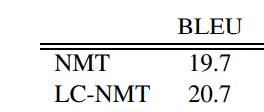

In [ ]:
#@title Does Neural Machine Translation Benefit from Larger Context?
from IPython.display import Image

Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/DoesNMTBenefitLargerContext.PNG")


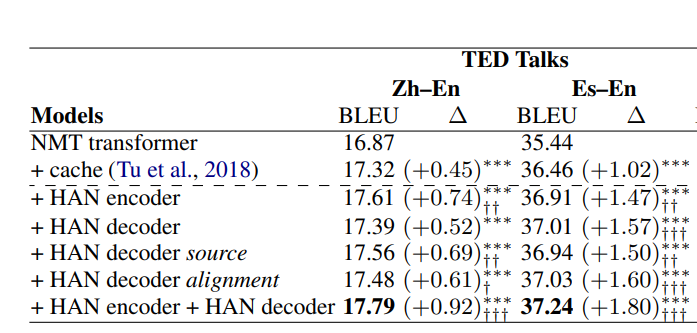

In [ ]:
#@title Document-Level Neural Machine Translation with Hierarchical Attention Networks
Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/DocumentLevelNMT.PNG")


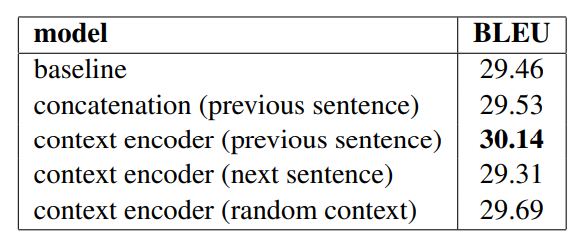

In [ ]:
#@title Context-Aware Neural Machine Translation Learns Anaphora Resolution
Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/ContextAwareNMTLearnsAnaphora.PNG")


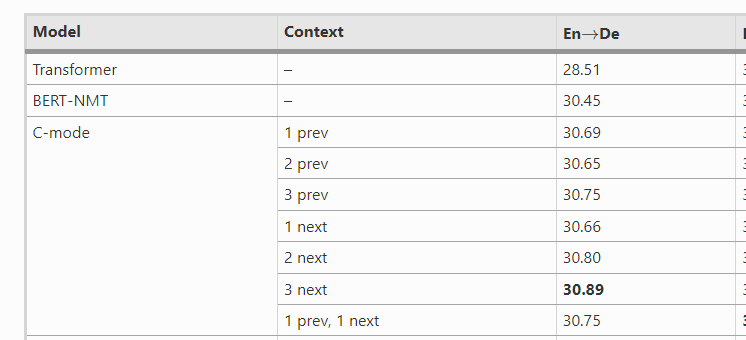

In [ ]:
#@title A study of BERT for context-aware neural machine translation
Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/BERTContextAwareNMT.PNG")


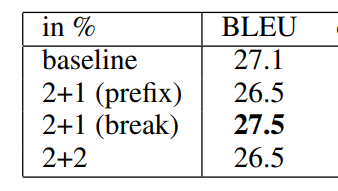

In [ ]:
#@title Neural Machine Translation with Extended Context
Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/NMTExtendedContext.PNG")


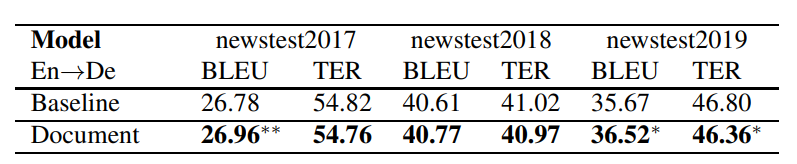

In [ ]:
#@title Using Whole Document Context in Neural Machine Translation
Image(filename="/content/drive/MyDrive/MoC Grant/Graphics/UsingWholeDocumentContextNMT.PNG")

In [ ]:
#mt5-base

                          #Baseline        #Bert2BertChap
#15 epochs                  27.48               27.52

In [ ]:
                        #mt5     #mt5(noExp)   #mt5(CTXT200bs8)  #mt5(CTXT400bs8) #mt5(CTXT512bs4)       #AraT5
#1  epoch               0.68
#10 epochs              26.39     21.92            12.31           15.27            17.11                  0.73


In [ ]:
                        #mt5(200bs16)     #mt5(noExp)   #mt5(CTXT200bs8)  #mt5(CTXT400bs8) #mt5(CTXT512bs4)       #AraT5
#1  epoch
#10 epochs                26.39                              9.93


In [ ]:
#T4
                      #mt5     #mt5(noExp)   #mt5(CTXT200bs4)  #mt5(CTXT400bs8) #mt5(CTXT512bs4)       #AraT5
#1  epoch
#10 epochs            29.43                       0.15


In [ ]:
Test_predicted=Test.copy()
Test_predicted['KeyBest_preds']=english_preds

In [ ]:
Test_predicted.to_csv(DataPath+'TestKeyBestPreds0504.csv',sep='\t',index=None)

In [ ]:
Test_predicted

,input_text,target_text,prefix,MbertChap_preds
2800,رسالة من المسلمين إلى محمد رسالة من الرسول محم...,"Indeed you, [O Muhammad], are from among the m...",translate arabic to english,"Indeed, you are of the messengers."
2801,صلاة مستقيم معتدل في الصحراء الصراط المستقيم ف...,On a straight path.,translate arabic to english,And upon a straight path -
2802,العزيز الرحيمي يناقش تأثيره على الكتابة عباده ...,[This is] a revelation of the Exalted in Might...,translate arabic to english,Then We will reveal the signs of the Most Merc...
2803,تحذير أممي من التعامل مع آباؤهم روتيني يزكي ال...,That you may warn a people whose forefathers w...,translate arabic to english,And We will surely warn a people that their fa...
2804,3 أطباء ينصحون بإنذار نفسي أصحاب همم لا يؤمنون...,Already the word has come into effect upon mos...,translate arabic to english,The statement has been revealed to most of the...
...,...,...,...,...
2902,قذف الحيوانات الخالية من بطنه بالعراء الأشجار ...,But We threw him onto the open shore while he ...,translate arabic to english,"So We shaded him with poverty, and he is a bar..."
2903,شجرة من يقطين في الظلها 5 نصائح لاستقطاب الظلا...,And We caused to grow over him a gourd vine.,translate arabic to english,And We cast upon him stones from which they ar...
2904,الشرك بين الملائكة والسلوك بالله أطباء ينصحون ...,"So inquire of them, [O Muhammad], ""Does your L...",translate arabic to english,So your Lord took retribution for the sons and...
2905,تعالى إنقاذ الناس من الملائكة 5 نصائح لمواجهة ...,Or did We create the angels as females while t...,translate arabic to english,Or did We destroy the angels as if they were i...


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
!rm -r "/content/outputs"

# Qualitative Analysis


In [ ]:
Test_predictedBase=pd.read_csv(DataPath+'TestBaselinePreds0304.csv',sep='\t')
Test_predictedMbert=pd.read_csv(DataPath+'TestMbertChapPreds0304.csv',sep='\t')

In [ ]:
Test_predictedKey=pd.read_csv(DataPath+'TestKeyBestPreds0504.csv',sep='\t')
Test_predictedMbert=pd.read_csv(DataPath+'TestMbertPreds0504.csv',sep='\t')


In [ ]:
Test_predicted=pd.read_csv(DataPath+'TestPredictedFinal0304.csv',sep='\t')

In [ ]:
Test_predicted=Test_predicted.copy()
Test_predicted['KeyBest_preds']=Test_predictedKey['KeyBest_preds']
Test_predicted['Mbert_preds']=Test_predictedMbert['Mbert_preds']

In [ ]:
Test_predicted=Test_predicted[['prefix','input_text','ContextAware_input','target_text','Baseline_preds','MbertChap_preds']]

In [ ]:
Test_predicted.to_csv(DataPath+'TestPredictedFinal0504.csv',sep='\t',index=None)

In [ ]:
Test_predicted=Test_predicted.astype(str)

In [ ]:
# Predict
import sacrebleu

english_truth = [ Test_predicted["target_text"].tolist()]

english_preds_Base =Test_predicted['Baseline_preds'].tolist()


english_preds_Mbert =Test_predicted['MbertChap_preds'].tolist()

ar_eng_bleu = sacrebleu.corpus_bleu(english_preds_Base, english_truth)
print("Baseline Overall: ", ar_eng_bleu.score)
ar_eng_bleu = sacrebleu.corpus_bleu(english_preds_Mbert, english_truth)
print("Mbert Overall: ", ar_eng_bleu.score)

Baseline Overall:  23.077428808401766
Mbert Overall:  24.942373412226463


In [ ]:
Baseline_Scores=[]
for i in range(len(english_preds_Base)):
  ar_eng_bleu = sacrebleu.corpus_bleu([english_preds_Base[i]], [[english_truth[0][i]]])
  Baseline_Scores.append(ar_eng_bleu)


In [ ]:
Mbert_Scores=[]
for i in range(len(english_preds_Mbert)):
  ar_eng_bleu = sacrebleu.corpus_bleu([english_preds_Mbert[i]], [[english_truth[0][i]]])
  Mbert_Scores.append(ar_eng_bleu)

In [ ]:
Baseline_ScoresOnly=[elm.score for elm in Baseline_Scores]
Mbert_ScoresOnly=[elm.score for elm in Mbert_Scores]

In [ ]:
Test_predicted['Baseline_ScoresOnly']=Baseline_ScoresOnly
Test_predicted['Mbert_ScoresOnly']=Mbert_ScoresOnly

Test_predicted['Baseline_Scores']=Baseline_Scores
Test_predicted['Mbert_Scores']=Mbert_Scores

In [ ]:
Test_predicted.to_csv(DataPath+'TestPredictedFinalScores0504.csv',sep='\t',index=None)

In [ ]:
Test_predicted=pd.read_csv(DataPath+'TestPredictedFinalScores0304.csv',sep='\t')

In [ ]:
pd.set_option('display.max_colwidth',1000)

In [ ]:
Test_predicted['Score_Diff']=Test_predicted['Mbert_ScoresOnly']-Test_predicted['Baseline_ScoresOnly']

In [ ]:
MbertBetter=Test_predicted[Test_predicted.Mbert_ScoresOnly>Test_predicted.Baseline_ScoresOnly]

In [ ]:
BaseBetter=Test_predicted[Test_predicted.Mbert_ScoresOnly<Test_predicted.Baseline_ScoresOnly]

In [ ]:
print(len(MbertBetter),'('+str(round(len(MbertBetter)/len(Test_predicted)*100))+'%)', 'Mbert BLUE score is better')
print('In average when Mbert is better, it outperforms Base by '+ str(round(MbertBetter['Score_Diff'].mean(),1)))
print('In mediane when Mbert is better, it outperforms Base by '+ str(round(MbertBetter['Score_Diff'].median(),1)))
print('The maximum difference in scores when Mbert is better is '+ str(round(MbertBetter['Score_Diff'].max(),1)))

54 (50%) Mbert BLUE score is better
In average when Mbert is better, it outperforms Base by 7.3
In mediane when Mbert is better, it outperforms Base by 6.1
The maximum difference in scores when Mbert is better is 32.8


In [ ]:
print(len(BaseBetter),'('+str(round(len(BaseBetter)/len(Test_predicted)*100))+'%)', 'Base BLUE score is better')
print('In average when Base is better, it outperforms Mbert by '+ str(abs(round(BaseBetter['Score_Diff'].mean(),1))))
print('In median when Base is better, it outperforms Mbert by '+ str(abs(round(BaseBetter['Score_Diff'].median(),1))))
print('The maximum difference in scores when Base is better is '+ str(round(abs(BaseBetter['Score_Diff']).max(),1)))

39 (36%) Base BLUE score is better
In average when Base is better, it outperforms Mbert by 8.0
In median when Base is better, it outperforms Mbert by 4.7
The maximum difference in scores when Base is better is 43.6


In [ ]:
MbertBetter.columns

Index(['input_text', 'ContextAware_input', 'target_text', 'Baseline_preds',
       'MbertChap_preds', 'KeyBest_preds', 'Mbert_preds',
       'Baseline_ScoresOnly', 'Mbert_ScoresOnly', 'Baseline_Scores',
       'Mbert_Scores', 'Score_Diff', 'KeyBest_Context', 'Mbert_Context'],
      dtype='object')

In [ ]:
MbertBetter[['input_text','ContextAware_input','Mbert_Context','KeyBest_Context','target_text','Baseline_preds','MbertChap_preds','Mbert_preds','KeyBest_preds']]

,input_text,ContextAware_input,Mbert_Context,KeyBest_Context,target_text,Baseline_preds,MbertChap_preds,Mbert_preds,KeyBest_preds
0,انك لمن المرسلين,رسالة من المسلمين إلى محمد رسالة من الرسول محمد الأدلة العظيمة لصلاة محمدEXPيسCHAPانك لمن المرسلين,رسالة من المسلمين إلى محمد رسالة من الرسول محمد الأدلة العظيمة لصلاة محمدEXPانك لمن المرسلين,جمله المرسلين فلست ببدع انك لمن المرسلين المقسم وشاهدا علي رساله محمدEXPانك لمن المرسلين,"Indeed you, [O Muhammad], are from among the messengers,","Indeed, You are of the messengers.","Indeed, you are of the messengers.","Indeed, you are among the messengers.","Indeed, you are of the messengers."
3,لتنذر قوما ما انذر ءاباؤهم فهم غٰفلون,تحذير أممي من التعامل مع آباؤهم روتيني يزكي الأجداد ويعلمهم الأمان والإمارات يتصدران الكتاب العربEXPيسCHAPلتنذر قوما ما انذر ءاباؤهم فهم غٰفلون,تحذير أممي من التعامل مع آباؤهم روتيني يزكي الأجداد ويعلمهم الأمان والإمارات يتصدران الكتاب العربEXPلتنذر قوما ما انذر ءاباؤهم فهم غٰفلون,تعالي علي رسالته واقام العرب الاميون يزالوا خالين امي ويذكر اهل الكتبEXPلتنذر قوما ما انذر ءاباؤهم فهم غٰفلون,"That you may warn a people whose forefathers were not warned, so they are unaware.",Then will you warn a grave saying of what their fathers promised them? Then will you be heedless of what their fathers promised?,"And We will surely warn a people that their fathers had warned their fathers, so they are humble.",And let not a word that preceded their fathers while they are humble.,"Then We will surely warn their fathers because of their fathers, so they are humble."
4,لقد حق القول علىٰ اكثرهم فهم لا يؤمنون,3 أطباء ينصحون بإنذار نفسي أصحاب همم لا يؤمنون القضاء الطبع على قلوب المعلمينEXPيسCHAPلقد حق القول علىٰ اكثرهم فهم لا يؤمنون,3 أطباء ينصحون بإنذار نفسي أصحاب همم لا يؤمنون القضاء الطبع على قلوب المعلمينEXPلقد حق القول علىٰ اكثرهم فهم لا يؤمنون,اكثرهم فهم يءمنون نفذ يقبل النذاره وهم الله بعثت فيهم لانذارهم بعدماEXPلقد حق القول علىٰ اكثرهم فهم لا يؤمنون,"Already the word has come into effect upon most of them, so they do not believe.","The statement has certainly been revealed to most of them, so they do not believe.","The statement has been revealed to most of them, so they do not believe.","The word has been revealed to most of them, so they do not believe.","The statement has been revealed to most of them, so they do not believe."
7,وسواء عليهم ءانذرتهم ام لم تنذرهم لا يؤمنون,أصحاب همم يطالبون بتدابير لم تنذرهم طبعة تؤمن من قلبك تأكيد على أهمية التعاون بين الحقائب والباطلEXPيسCHAPوسواء عليهم ءانذرتهم ام لم تنذرهم لا يؤمنون,أصحاب همم يطالبون بتدابير لم تنذرهم طبعة تؤمن من قلبك تأكيد على أهمية التعاون بين الحقائب والباطلEXPوسواء عليهم ءانذرتهم ام لم تنذرهم لا يؤمنون,طبع علي قلبه وراي عليهم اانذرتهم ام تنذرهم الحق باطلا والباطل حقاEXPوسواء عليهم ءانذرتهم ام لم تنذرهم لا يؤمنون,And it is all the same for them whether you warn them or do not warn them - they will not believe.,"And whether We warn them or do not warn them, they will not believe.","And if you warn them or do not warn them or do not warn them, they will not believe.","And they swear by them, [O Muhammad], or do not warn them, nor do they believe.","And their eyes are recited to them, nor do they warn them, nor do they believe."
8,انما تنذر من اتبع الذكر وخشي الرحمٰن بالغيب فبشره بمغفرة واجر كريم,أصحاب همم قبلوا النذر حق الحق في طلب الحق مغفرون وأصحاب همم يطالبون بتعليمهم الذكيEXPيسCHAPانما تنذر من اتبع الذكر وخشي الرحمٰن بالغيب فبشره بمغفرة واجر كريم,أصحاب همم قبلوا النذر حق الحق في طلب الحق مغفرون وأصحاب همم يطالبون بتعليمهم الذكيEXPانما تنذر من اتبع الذكر وخشي الرحمٰن بالغيب فبشره بمغفرة واجر كريم,برسالتك ويزكون بتعليمك وهذا الامرين بشره بمغفره لذنوبه وفق لهذين الامرين بشرهEXPانما تنذر من اتبع الذكر وخشي الرحمٰن بالغيب فبشره بمغفرة واجر كريم,You can only warn one who follows the message and fears the Most Merciful unseen. So give him good tidings of forgiveness and noble reward.,"Indeed, you are only followed by the Qur'an and the Most Merciful for the unseen, so give him a good reward and a good reward.","Indee